In [29]:
import dgl
import torch
import torch.nn as nn
import numpy as np
import networkx as nx

In [30]:
def collate(samples):
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

In [31]:
from torch.utils.data import DataLoader

num_examples = 8
min_number_nodes = 4
max_number_nodes = 10

minibatch_size = 16

train_set = dgl.data.MiniGCDataset(num_examples, min_number_nodes, max_number_nodes, seed=0)

train_dataloader = DataLoader(
    train_set, batch_size=minibatch_size, drop_last=False, shuffle=True, collate_fn=collate)

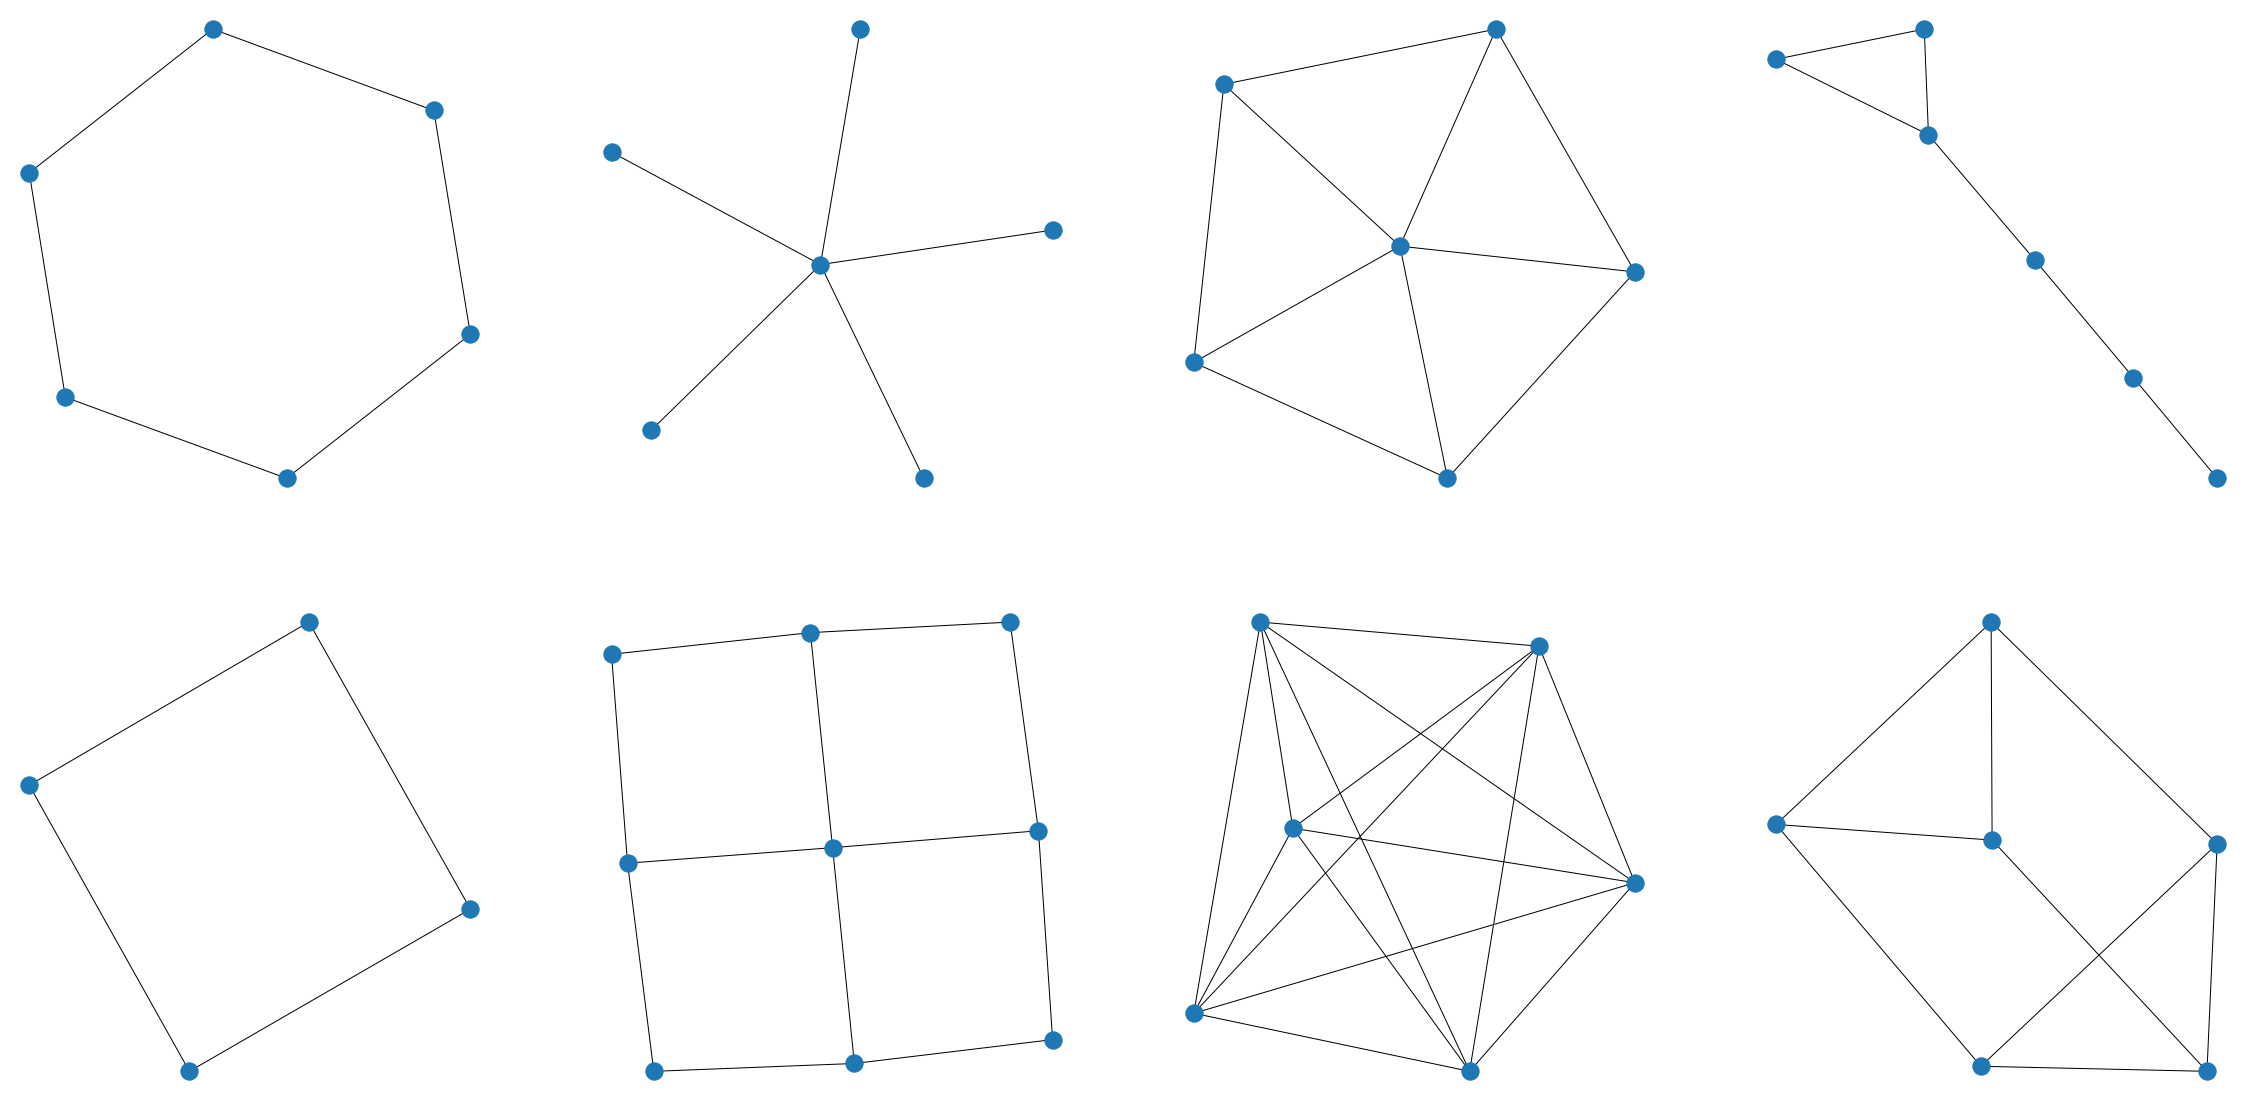

In [47]:
import matplotlib.pyplot as plt
import math
fig, ax = plt.subplots(2, 4, figsize=(40,20))

nx.draw(nx.cycle_graph(6), ax=ax[0, 0])
nx.draw(nx.star_graph(5), ax=ax[0, 1])
nx.draw(nx.wheel_graph(6), ax=ax[0, 2])
nx.draw(nx.lollipop_graph(m=3, n=3), ax=ax[0, 3])
nx.draw(nx.convert_node_labels_to_integers(nx.hypercube_graph(int(math.log(6, 2)))), ax=ax[1, 0])
nx.draw(nx.convert_node_labels_to_integers(nx.grid_graph([3, 3])), ax=ax[1, 1])
nx.draw(nx.complete_graph(6), ax=ax[1, 2])
nx.draw(nx.circular_ladder_graph(3), ax=ax[1, 3])



In [34]:
for batched_graph, labels in train_dataloader:
    pass
batched_graph

Graph(num_nodes=49, num_edges=177,
      ndata_schemes={}
      edata_schemes={})

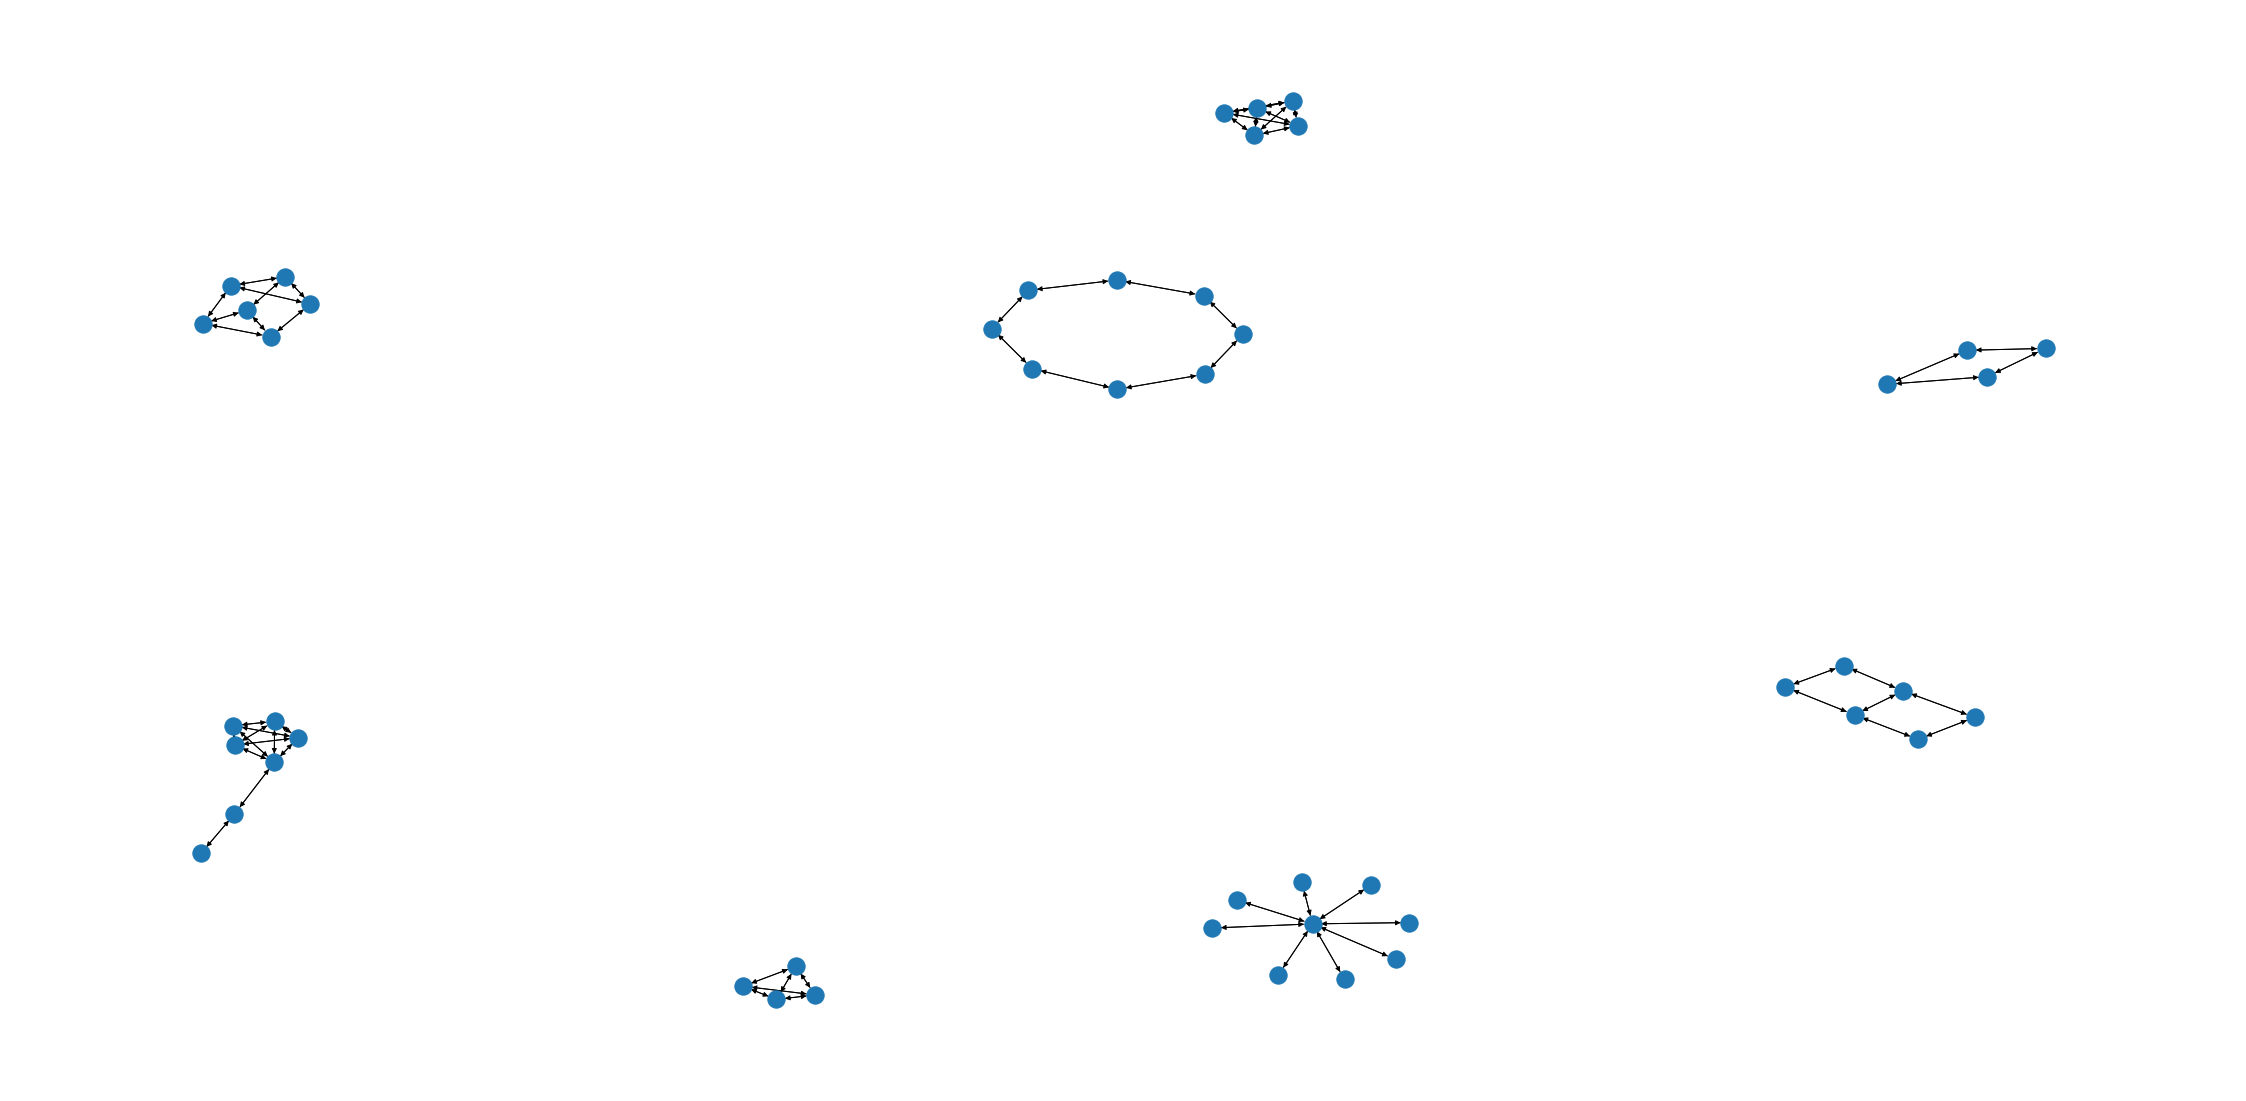

In [45]:
fig, ax = plt.subplots(figsize=(40,20))
nx.draw(batched_graph.to_networkx(), ax=ax)
plt.show()